In [1]:
from util import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

runtime_df = pd.read_parquet(f"{RUNTIME_DIR}/all_gpus_preprocessed.parquet")
gpu_mapping = {'2080': '2080Ti', '1080': '1080Ti', 'a40': 'A40', 'p100': 'P100', 'v100': 'V100'}

# runtime_df = runtime_df[(runtime_df.dataset_type == 'tpc_ai') & (~runtime_df.operator.isin(['Noop', 'Materialization']))]
# runtime_df.GPU = runtime_df.GPU.astype(str).apply(lambda x: gpu_mapping[x])
# runtime_df.head()

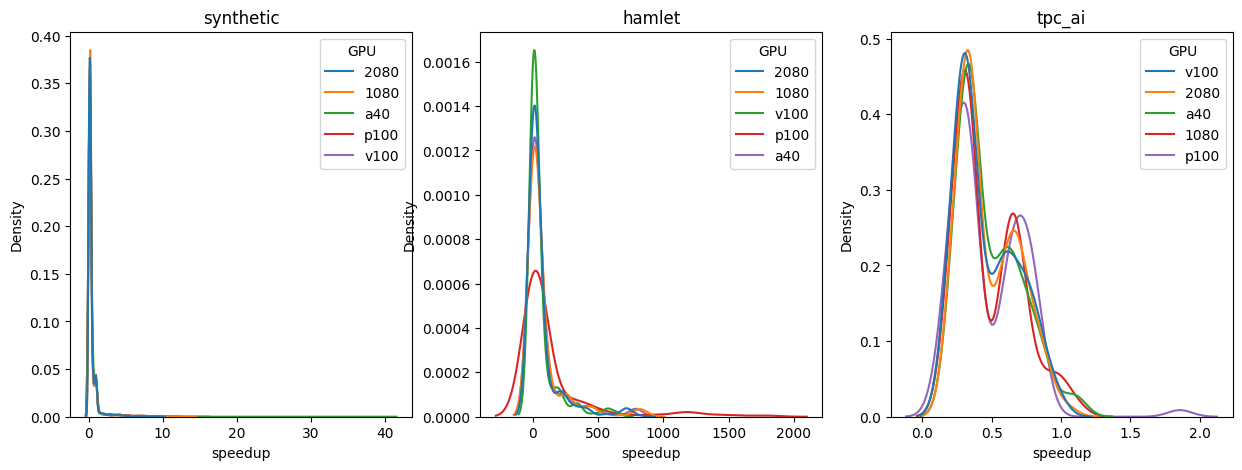

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, dataset_type in enumerate(runtime_df.dataset_type.unique()):
    sns.kdeplot(data=runtime_df[runtime_df.dataset_type == dataset_type], x='speedup', hue='GPU', ax=ax[i])
    ax[i].set_title(dataset_type)